In [1]:
%load_ext autoreload
%autoreload 2

import os, sys
import pandas as pd
import numpy as np
import glob
import pickle
import matplotlib.pyplot as plt
%matplotlib inline  
from matplotlib.pyplot import get_cmap


from scipy.spatial.distance import cdist




In [2]:
src_dir = os.path.abspath(os.path.join(os.pardir,os.pardir,'src'))
sys.path[0] = src_dir

# from analysis.density import cdf_dist_arrid_vec

In [3]:
(np.sqrt(5)-1.0)/2.0

0.6180339887498949

# Get data

In [4]:
path_read = os.path.join(os.pardir,'data_filter')
fname_read = 'ipip300-no0_arr_pd_neoac_score-1.npy'
filename = os.path.join(path_read,fname_read)
arr_pd =  np.load(filename)
#####
# z-score the data in each dimension
#####
N_,D_ = np.shape(arr_pd)
for d in range(D_):
    x_tmp = arr_pd[:,d]
    x_mu = np.mean(x_tmp)
    x_std = np.std(x_tmp)
    arr_pd[:,d] = (x_tmp - x_mu)/x_std

In [5]:
r = 0.8 ## reliability
t = 1.96 ## t-statistic (1.96 for 95% confidence)
## the t-statistic above determines the confidence interval
## e.g. 95%, we would reject on a 0.05-significance level
## for a given value x mapped to true score x*r, we count the fraction of respondents
## that are outside this confidence interval.
d_r_crit = t*np.sqrt(r*(1.-r))

In [6]:
## select one trait
x = arr_pd[:,0]
x_r = r*x ## regressed scores

In [7]:
arr_x = np.linspace(-3,3,100)
arr_N_d = np.zeros( len(arr_x) )
for i_x_sel,x_sel in enumerate(arr_x):
    x_r_sel = r*x_sel
    d_r = np.abs(x_r_sel - x_r)
    N_d = len(np.where( d_r > d_r_crit )[0])
    arr_N_d[i_x_sel] = N_d/N_
    


In [8]:
bins = np.linspace(-3,3,51)
H,edges = np.histogram(x,bins=bins,density=True)

(0, 1)

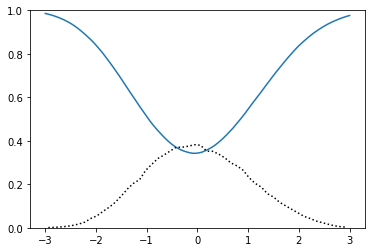

In [9]:
plt.plot(arr_x,arr_N_d)

x_ = 0.5*(edges[1:]+edges[:-1])
y_ = H
plt.plot(x_,y_,color='black',ls=':')

plt.ylim(0,1)

In [10]:
###########
## Setup ##
###########
# number of pt for column in latex-document
fig_width_pt = 246  # single-column:510, double-column: 246; Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.1/72.27 # Convert pt to inches
width_vs_height = (np.sqrt(5)-1.0)/1.8# Ratio of height/width [(np.sqrt(5)-1.0)/2.0]
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = width_vs_height*fig_width  # height in inches
Ampl = 1.0 # Amplification factor for screen: set this to ONE for final plot of eps
fig_size = [Ampl*fig_width,Ampl*fig_height]

# here you can set the parameters of the plot (fontsizes,...) in pt
params = {'backend': 'ps',
          'axes.labelsize': Ampl*10,
#           'text.fontsize': Ampl*10,
          'legend.fontsize': Ampl*8,
          'xtick.labelsize': Ampl*10,
          'ytick.labelsize': Ampl*10,
          'text.usetex': True,
          'ps.usedistiller' : 'xpdf',
          'figure.figsize': fig_size,
          #'figtext.fontsize': Ampl*10,
          'text.latex.unicode':True,
          'text.latex.preamble': [r'\usepackage{bm}'],
          'xtick.direction':'out',
          'ytick.direction':'out',
          
          'axes.spines.right' : False,
          'axes.spines.top' : False

         }
plt.rcParams.update(params)

/home/martin/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


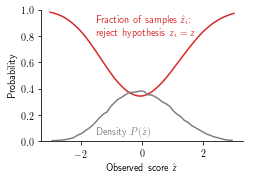

In [14]:
cmap = get_cmap('tab10')


f = plt.figure()
plt.clf()
ax = f.add_subplot(111)
# ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis



c0 = cmap(3)
x_pl = arr_x
y_pl = arr_N_d
p1 =ax.plot(x_pl,y_pl,color=c0,label=r'Fraction reject $\hat{x}_i=\hat{x}$')

c1 = cmap(7)
x_pl = 0.5*(edges[1:]+edges[:-1])
y_pl = H
p2=ax.plot(x_pl,y_pl,color=c1,label=r'Density $P(\hat{z})$')

# ax.legend(frameon=False)
ax.set_xlabel(r'Observed score $\hat{z}$')
ax.set_ylabel(r'Probability')

ax.set_ylim(0,1)

s = r'Density $P(\hat{z})$'
ax.text(-1.5,0.05,s,color=c1)
s = r'Fraction of samples $\hat{z}_i$:'
ax.text(-1.5,0.9,s,color=c0)
s = r'reject hypothesis $z_i=z$'
ax.text(-1.5,0.8,s,color=c0)

# ax2.set_ylabel(r'Density $P(\hat{x})$',color=c1)


plt.subplots_adjust(bottom=0.175,wspace=0.4,left=0.15)

path_save = '../figures/'
fname_save = 'commentary-freudenstein_fig-a-trait-uncertainty.png'
filename = os.path.join(path_save,fname_save)
plt.savefig(filename,dpi=300)